In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# local imports
import wrangle as w

# ignore warninga
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

In [2]:
import wrangle as w

In [3]:
df = w.wrangle_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540455 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   invoice_no         540455 non-null  object 
 1   stock_code         540455 non-null  object 
 2   description        540455 non-null  object 
 3   quantity           540455 non-null  int64  
 4   unit_price         540455 non-null  float64
 5   customer_id        540455 non-null  float64
 6   country            540455 non-null  object 
 7   is_return          540455 non-null  int64  
 8   return_unit_price  540455 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 41.2+ MB


In [5]:
df.describe()

,quantity,unit_price,customer_id,is_return,return_unit_price
count,540455.000000,540455.000000,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.851471,0.018063,0.000004
std,218.007598,96.889628,6760.792031,0.133178,0.001924
min,-80995.000000,-11062.060000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,12367.000000,0.000000,0.000000
50%,3.000000,2.080000,14390.000000,0.000000,0.000000
75%,10.000000,4.130000,16261.000000,0.000000,0.000000
max,80995.000000,38970.000000,18287.000000,1.000000,1.000000


## Lets take a look at the distributions of all features in the data

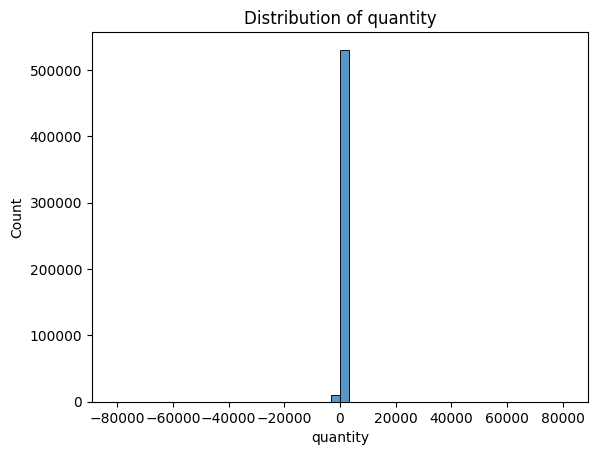

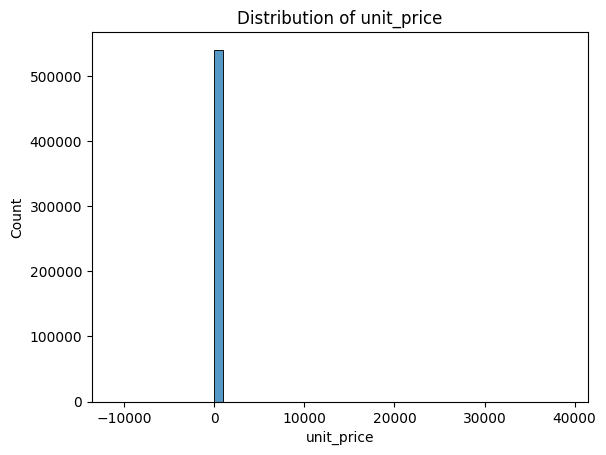

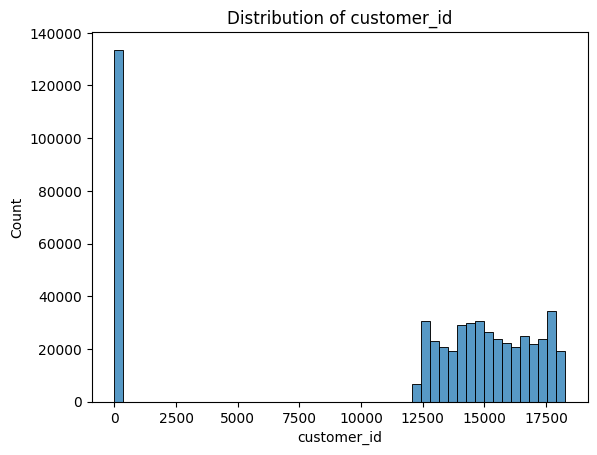

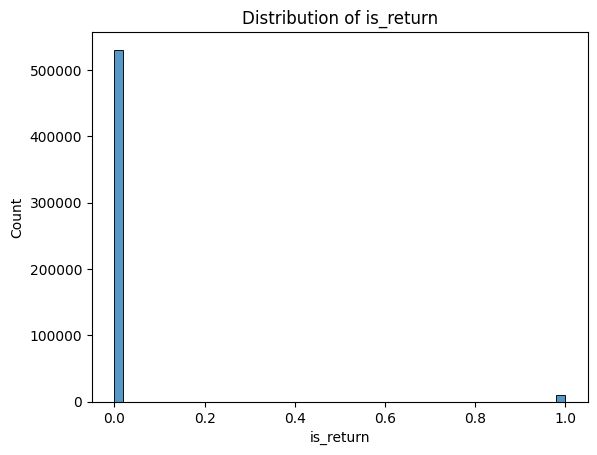

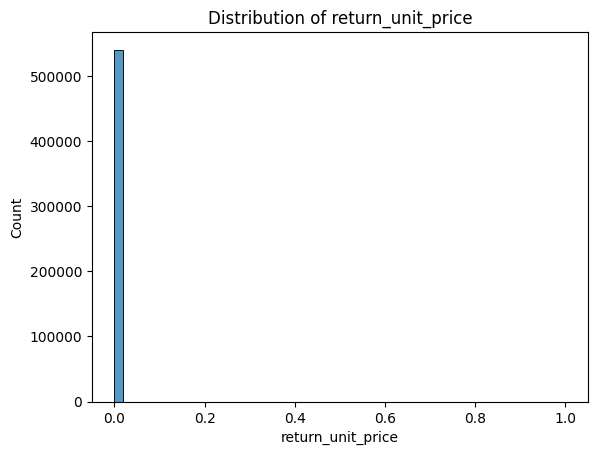

In [6]:
numeric_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

# Created histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col, bins=50)
    plt.show()

## Categorical data distributions

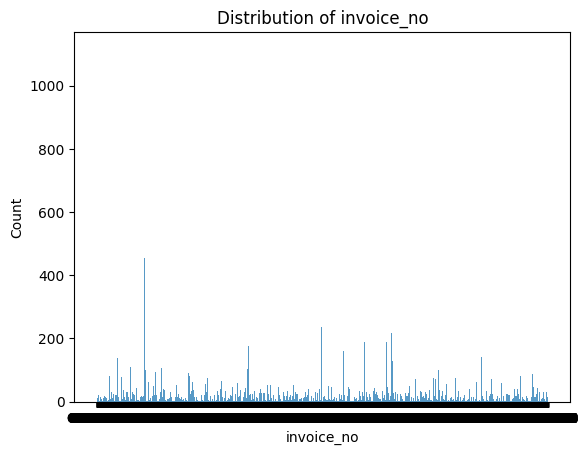

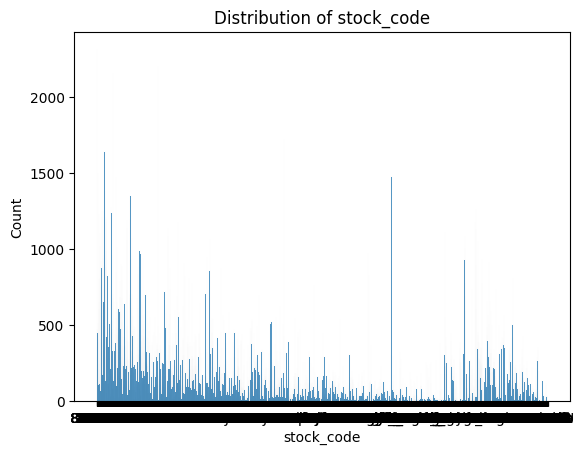

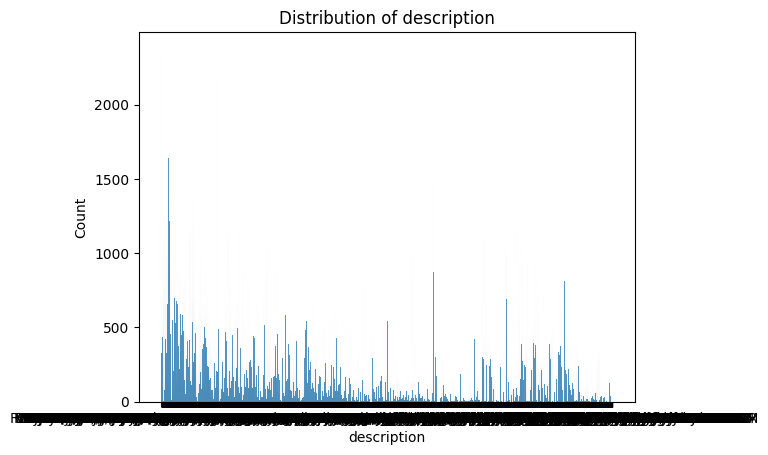

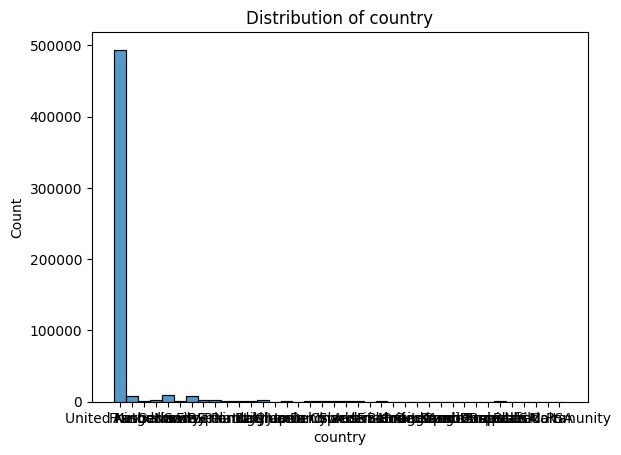

In [7]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

# what are the country distributions within this data?

In [8]:
country_cnts = df.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

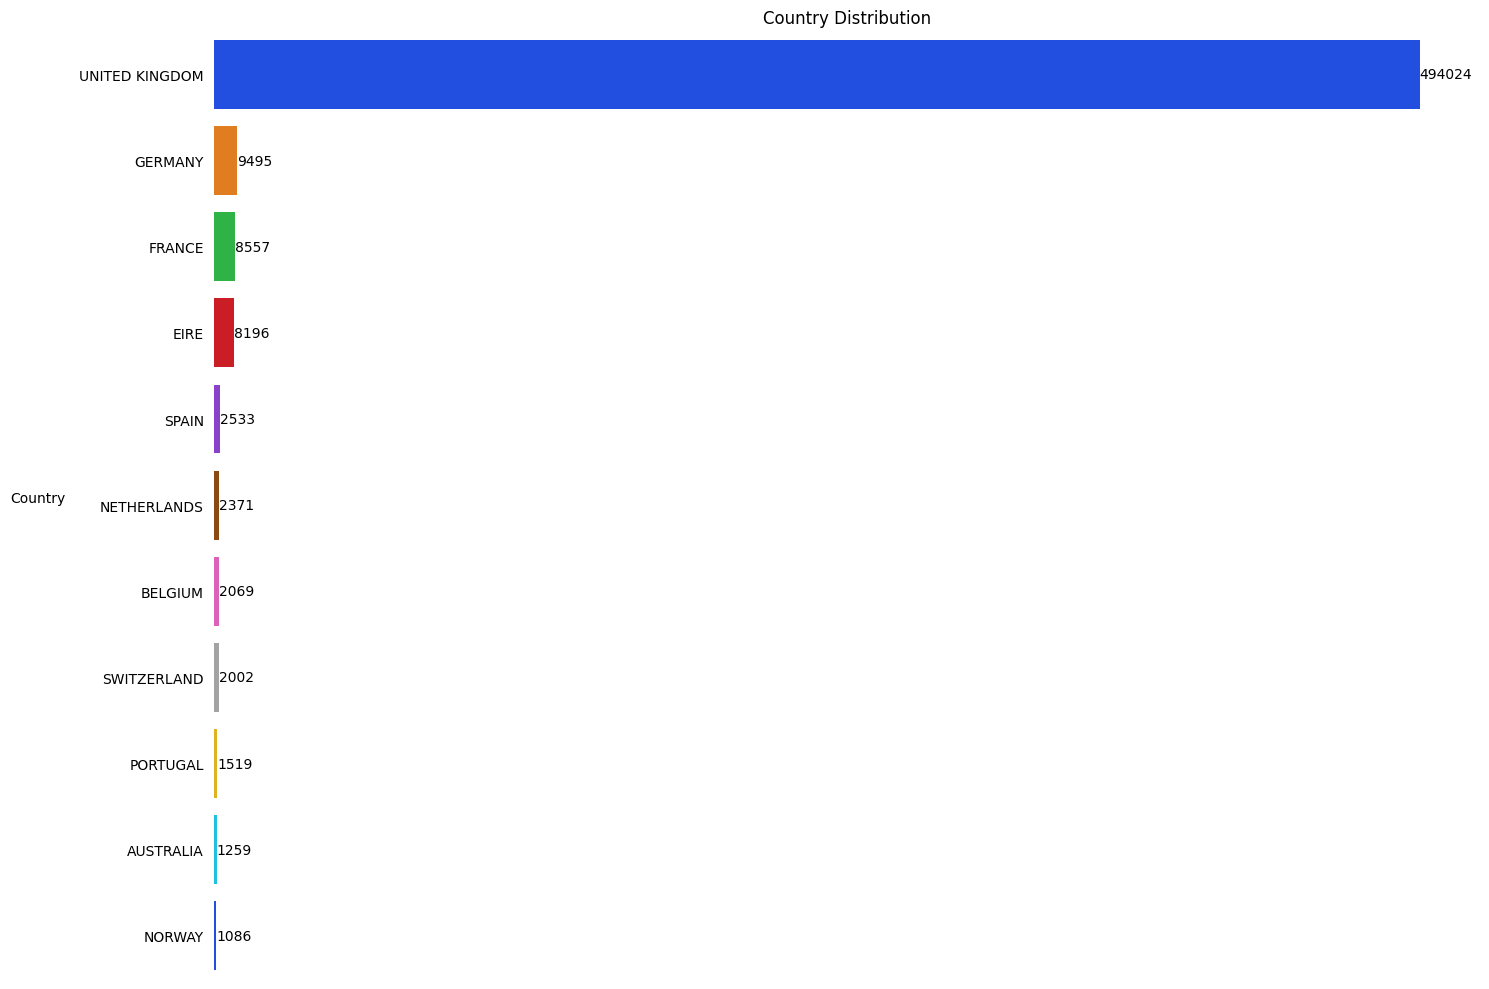

In [9]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()